# Perform ‘Exploratory Data Analysis’ on the provided dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading Data Set
data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\SPARKS FOUNDATION\SampleSuperstore.csv")
print('The data set is given below')
data.head()

The data set is given below


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.shape

(9994, 13)

<AxesSubplot:>

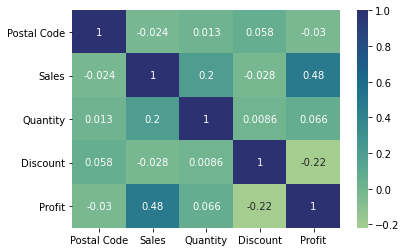

In [6]:
corr=data.corr
sns.heatmap(data.corr(),annot=True,cmap='crest')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


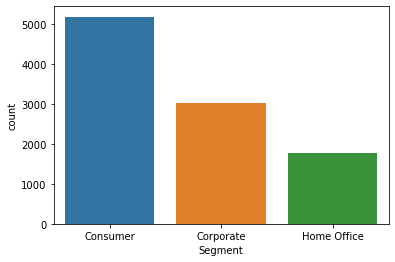

In [9]:
sns.countplot(data['Segment'])
plt.show()

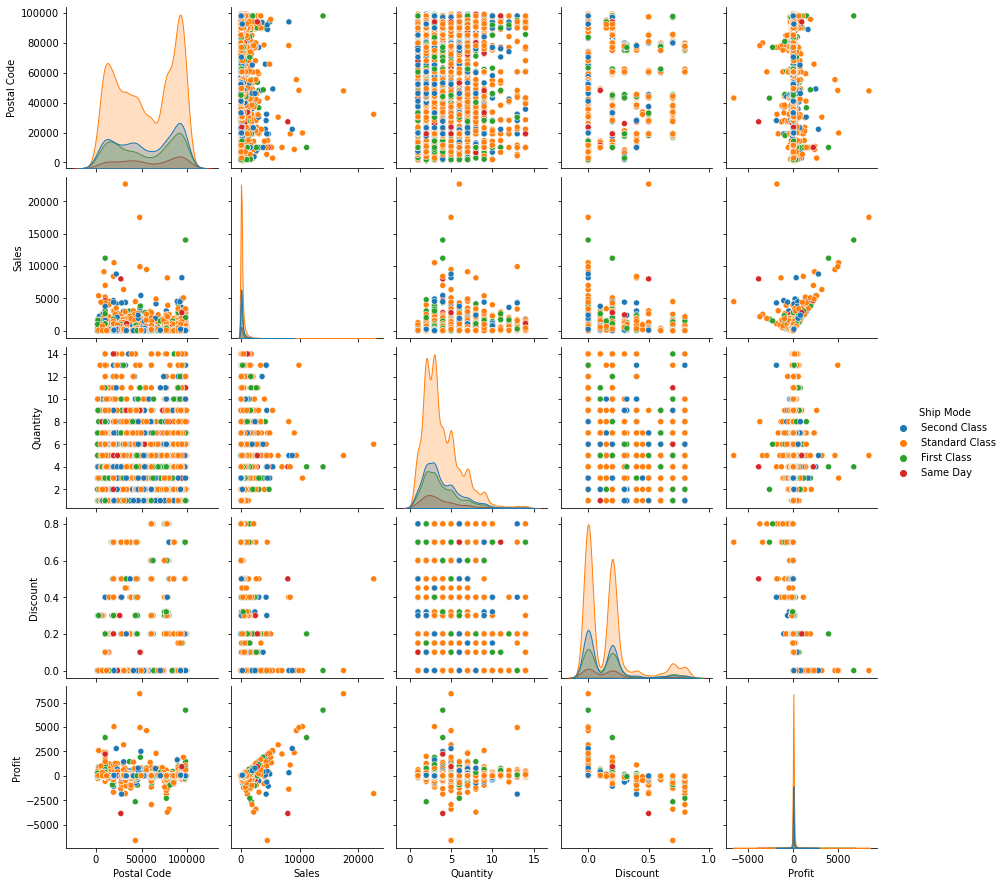

In [7]:
sns.pairplot(data,hue='Ship Mode')

array([[<AxesSubplot:title={'center':'Postal Code'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Discount'}>],
       [<AxesSubplot:title={'center':'Profit'}>, <AxesSubplot:>]],
      dtype=object)

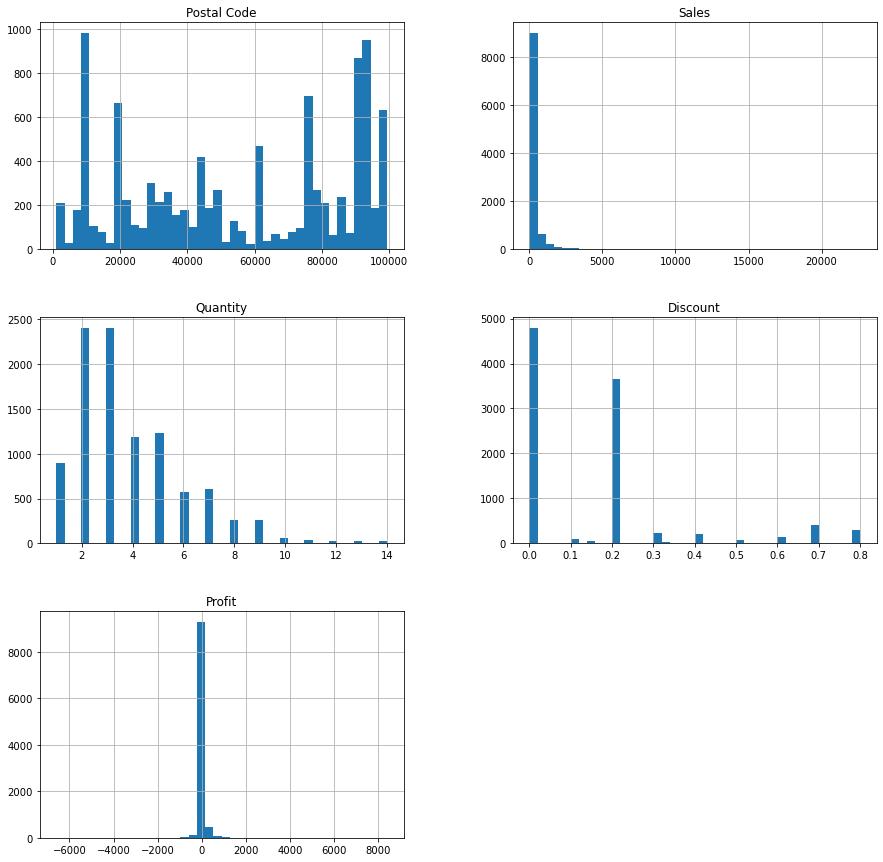

In [10]:
data.hist(figsize=(15,15),bins=40)

# Observations

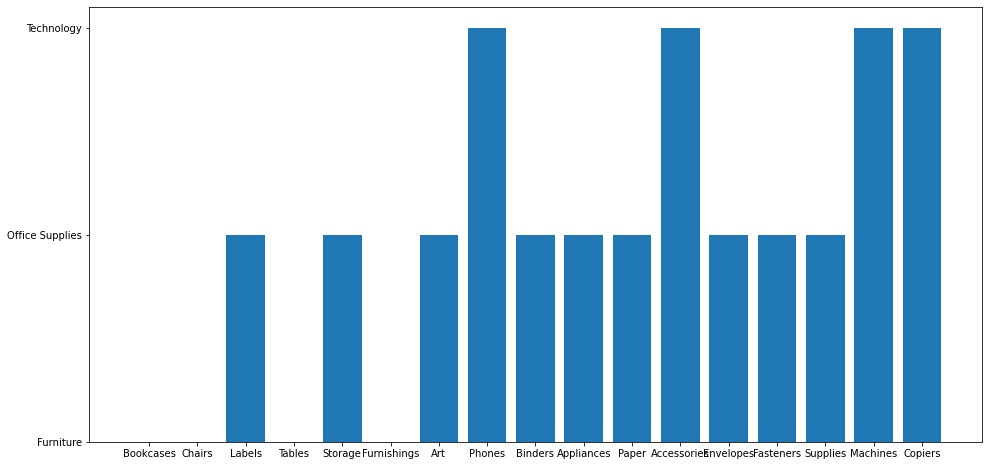

In [22]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data)
plt.show()

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

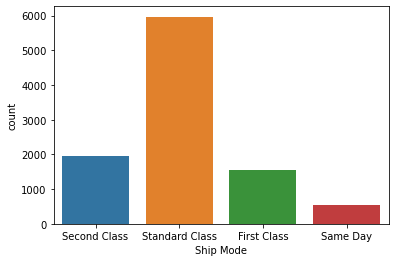

In [26]:
sns.countplot(x=data['Ship Mode'])

<AxesSubplot:xlabel='Region', ylabel='count'>

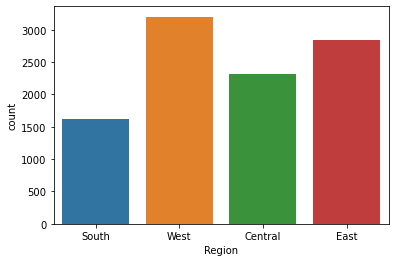

In [27]:
sns.countplot(x=data['Region'])

<AxesSubplot:xlabel='Category', ylabel='count'>

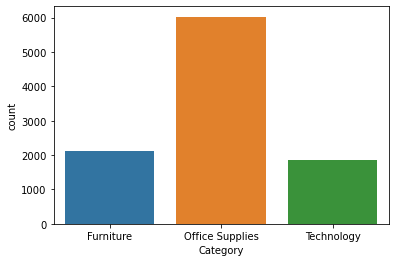

In [28]:
sns.countplot(x=data['Category'])

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

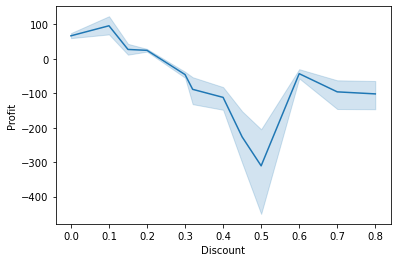

In [32]:
sns.lineplot(x='Discount',y='Profit',data=data)

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

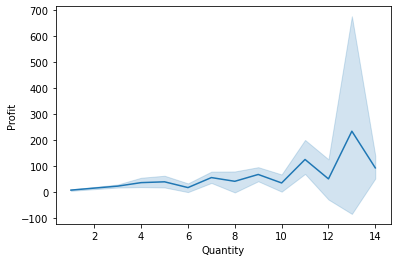

In [52]:
sns.lineplot(x='Quantity',y='Profit',data=data)

<AxesSubplot:xlabel='Segment'>

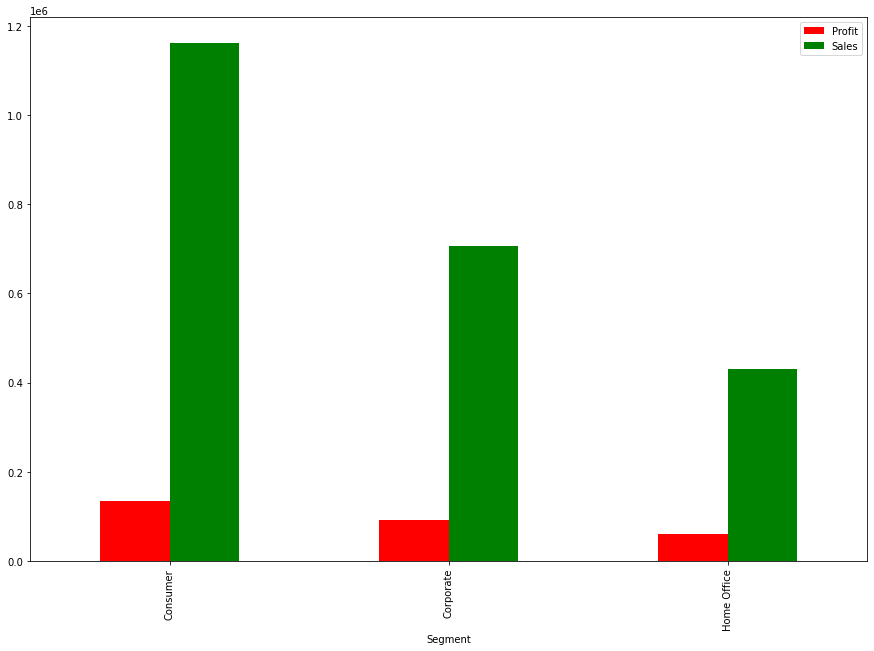

In [37]:
data.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['Red','Green'],figsize=(15,10))

<AxesSubplot:xlabel='Region'>

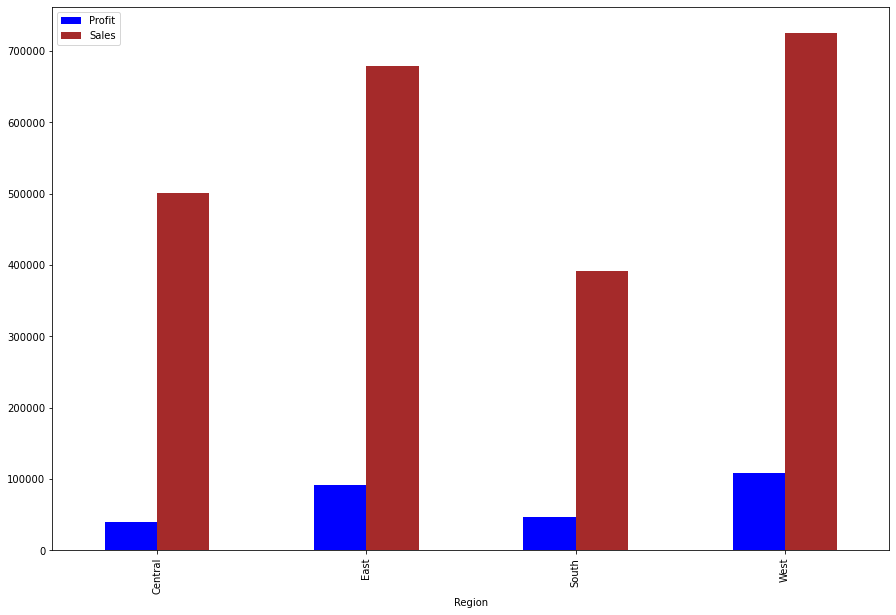

In [44]:
data.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['Blue','Brown'],figsize=(15,10))

<AxesSubplot:xlabel='Sub-Category'>

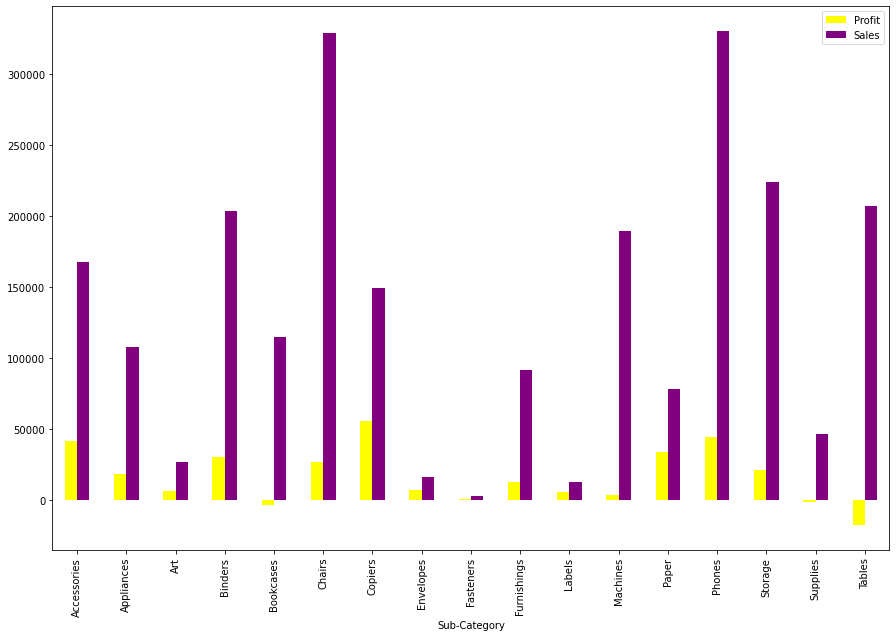

In [48]:
data.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['Yellow','Purple'],figsize=(15,10))

Text(0, 0.5, 'Profit')

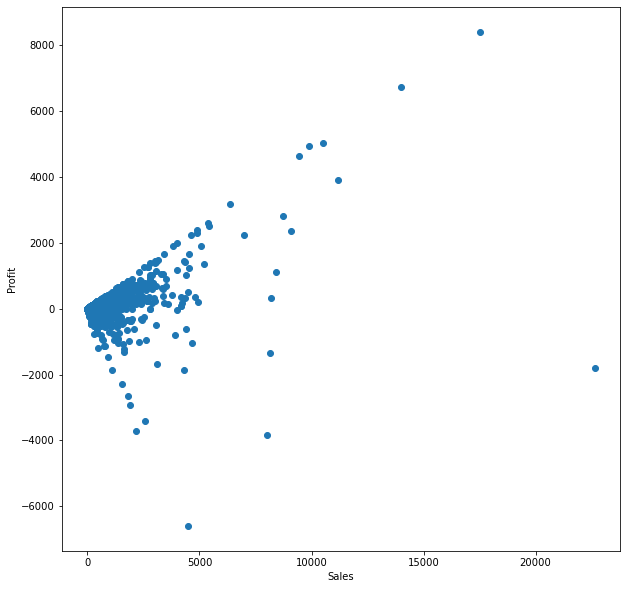

In [51]:
flg,ax=plt.subplots(figsize=(10,10))
ax.scatter(data['Sales'],data['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')

Text(0.5, 0, 'Region')

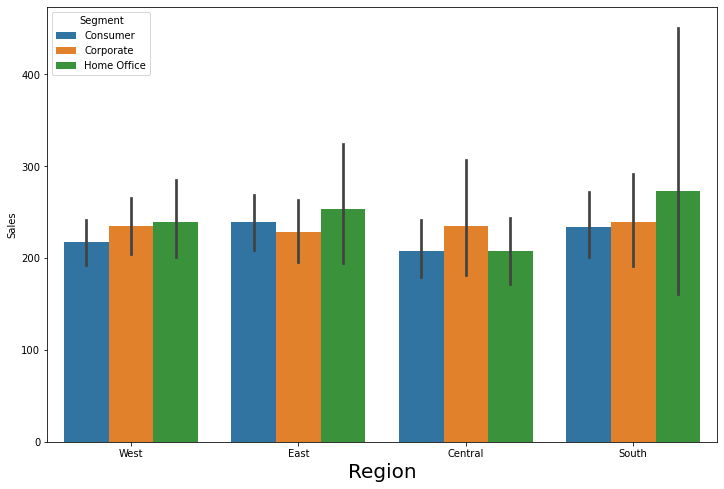

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x='Region',y='Sales',data=data,hue='Segment',order=data['Region'].value_counts().index)
plt.xlabel('Region',fontsize=20)

Text(0, 0.5, 'Profit')

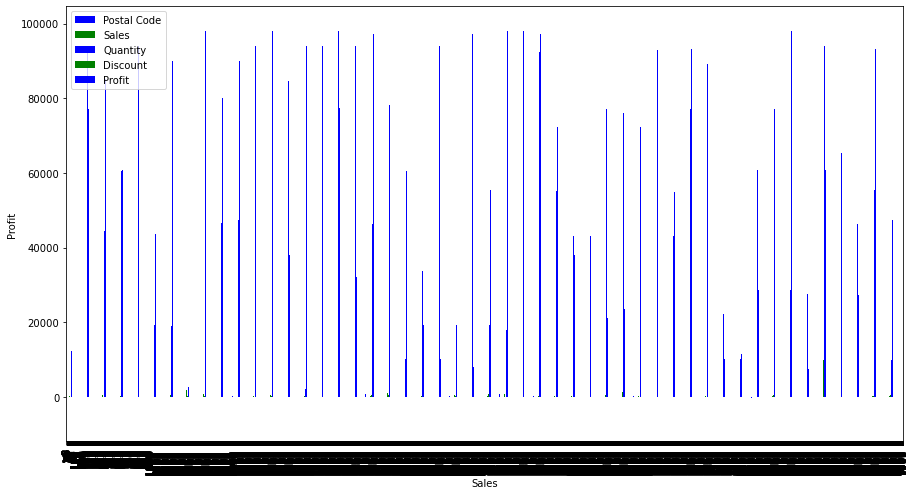

In [59]:
data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
data.plot.bar(color=['blue','Green'],figsize=(15,8))
plt.xlabel('Sales')
plt.ylabel('Profit')

In [11]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [13]:
remove_outlier(data,k=3.33)

In [14]:
ds.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [15]:
ds.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9906.000000,9906.000000,9906.000000,9906.000000,9906.000000
mean,55279.143045,196.334177,3.775389,0.155057,24.124557
std,32065.669679,383.685746,2.220942,0.204990,94.087165
min,1040.000000,0.444000,1.000000,0.000000,-734.526400
25%,23223.000000,17.088000,2.000000,0.000000,1.751550
50%,57701.000000,52.760000,3.000000,0.200000,8.606400
75%,90008.000000,201.866000,5.000000,0.200000,28.847950
max,99301.000000,8187.650000,14.000000,0.800000,793.716000


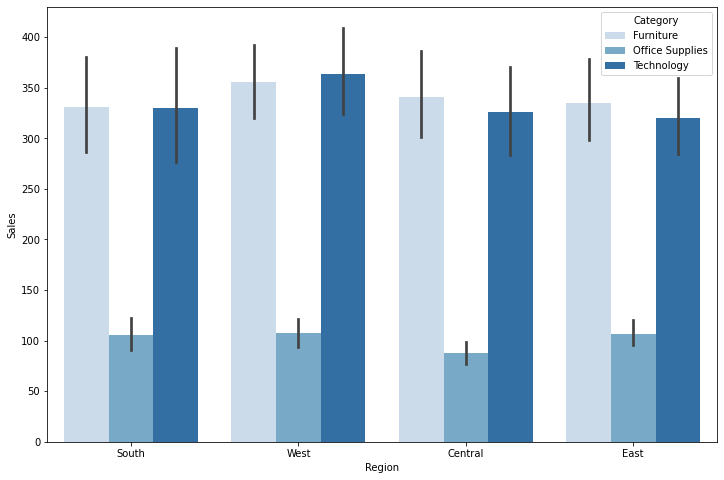

In [17]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Blues")

Since Sales is highest in the west region

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


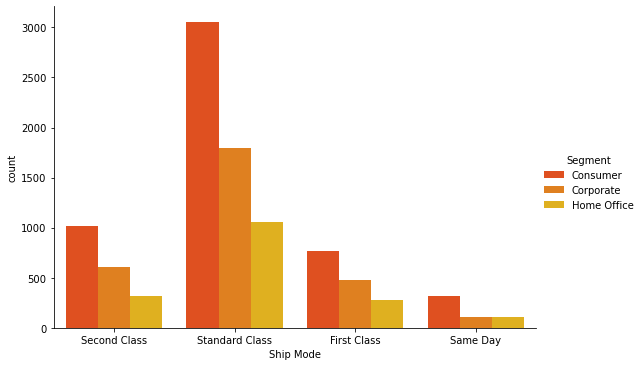

In [19]:
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="autumn")

When ship mode is the standard class customer count is the highest

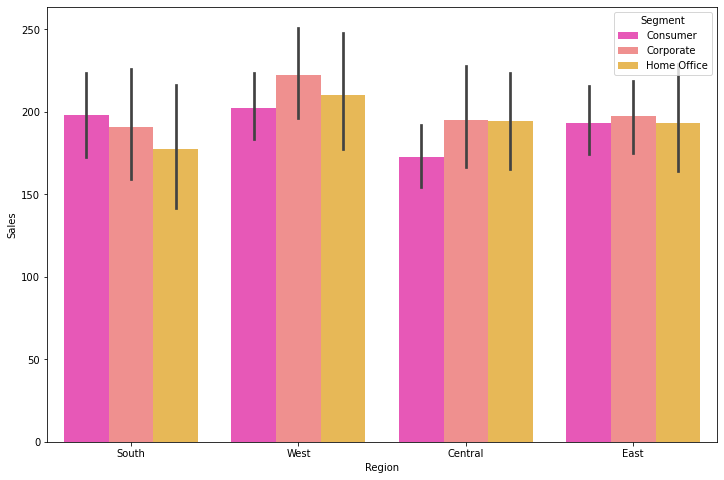

In [20]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="spring")

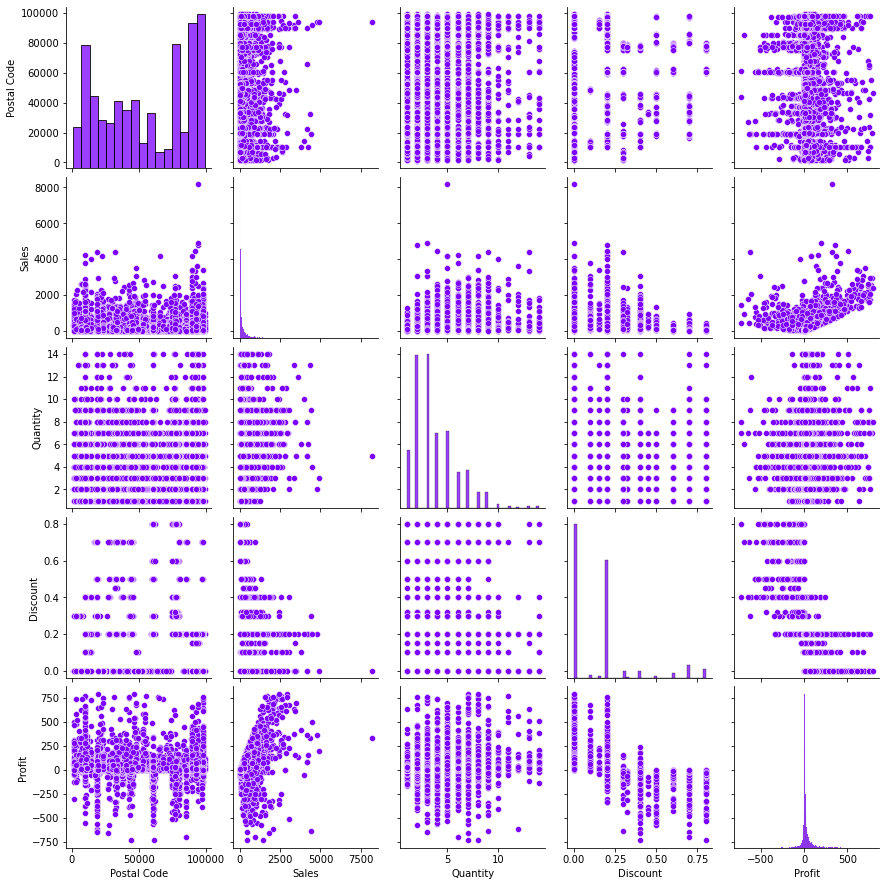

In [21]:
sns.set_palette('gist_rainbow_r')
sns.pairplot(ds)

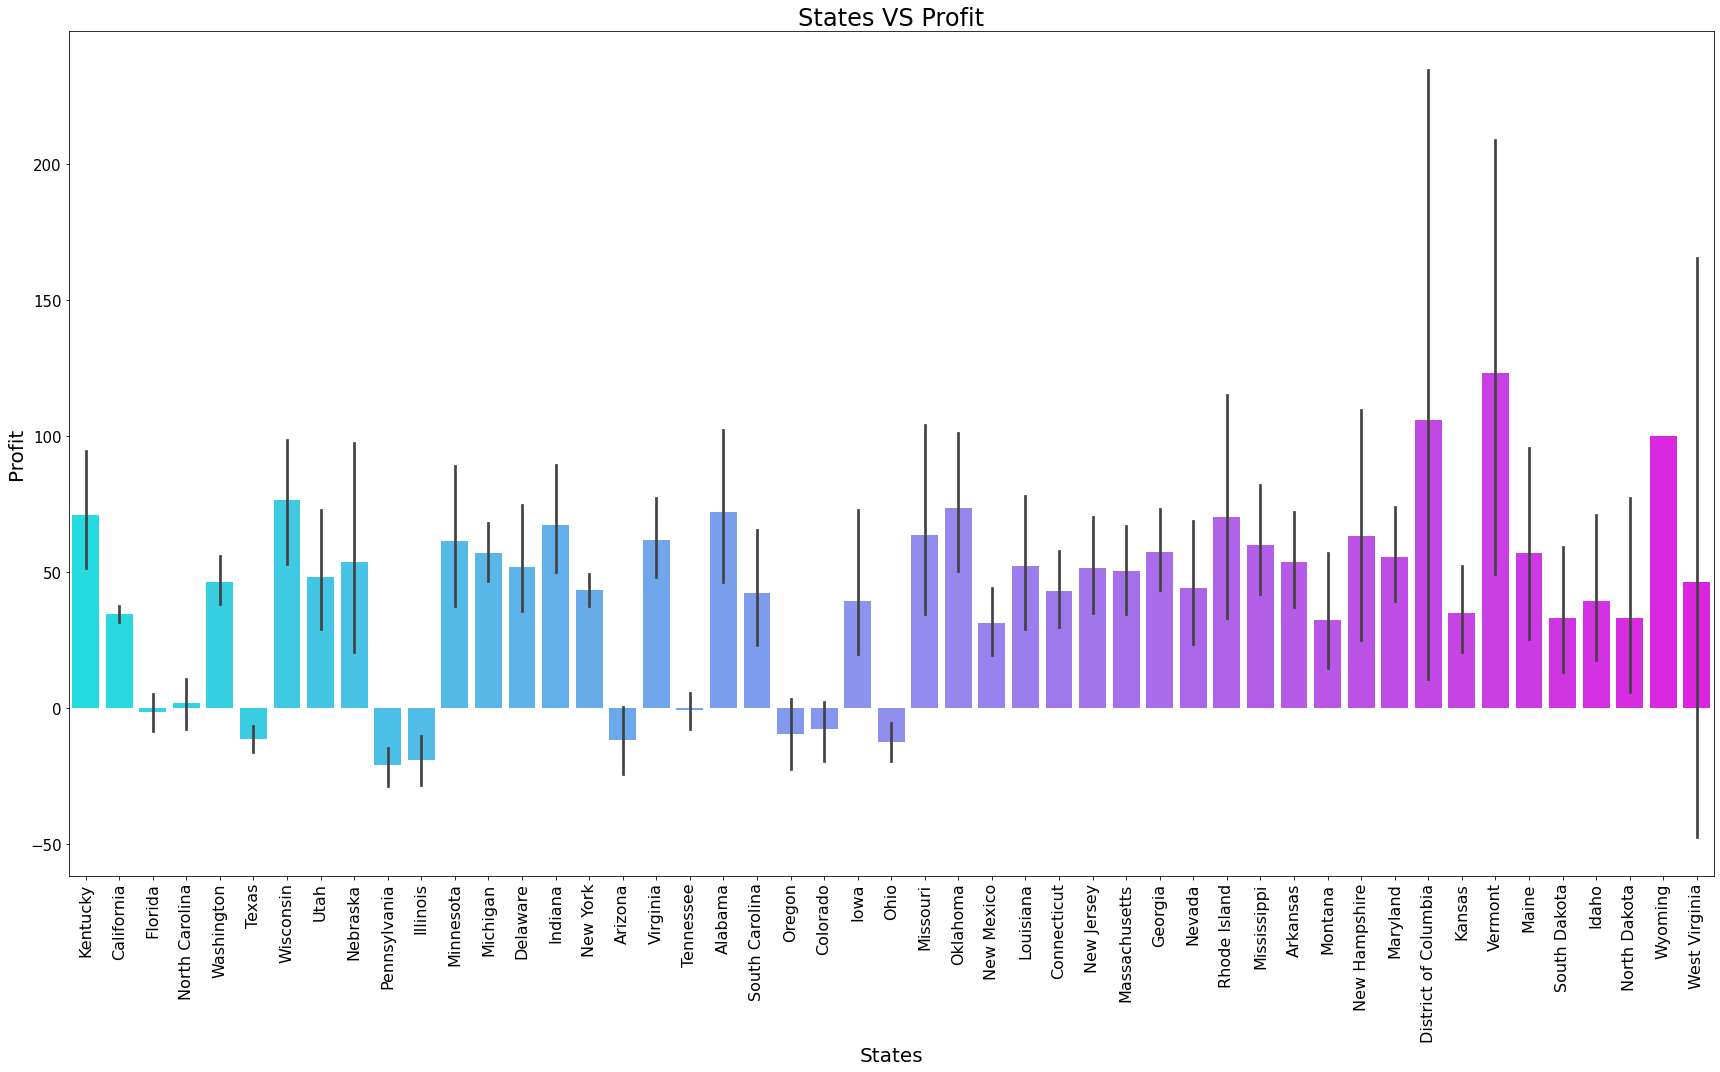

In [24]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="cool",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

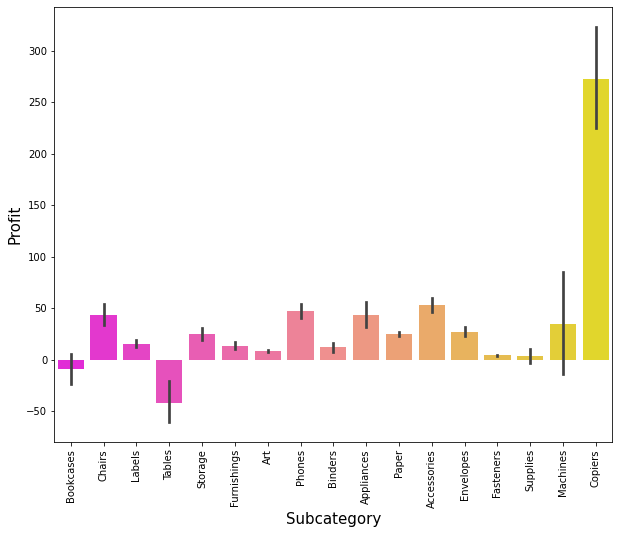

In [25]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="spring")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

Thus Maximum profit is generated by the copiers. 'Tables' and 'Bookcases' are causing loss. 